### Importing Necessary Library and doing some basic checks on data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Rruhid/data/refs/heads/master/homicide_by_countries.csv")

In [4]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6.7,2474,2018
1,Albania,Europe,Southern Europe,2.1,61,2020
2,Algeria,Africa,Northern Africa,1.3,580,2020
3,Andorra,Europe,Southern Europe,2.6,2,2020
4,Angola,Africa,Middle Africa,4.8,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36.7,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1.5,1358,2011
192,Yemen,Asia,Western Asia,6.8,1703,2013
193,Zambia,Africa,Eastern Africa,5.4,853,2015


In [5]:
df.shape

(195, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Location   195 non-null    object 
 1   Region     195 non-null    object 
 2   Subregion  195 non-null    object 
 3   Rate       195 non-null    float64
 4   Count      195 non-null    int64  
 5   Year       195 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.3+ KB


In [7]:
df.describe()

,Rate,Count,Year
count,195.000000,195.000000,195.000000
mean,6.845128,1942.800000,2017.420513
std,9.600060,6553.343376,3.589445
min,0.000000,0.000000,2006.000000
25%,1.100000,28.000000,2016.000000
50%,2.600000,128.000000,2019.000000
75%,7.850000,785.000000,2020.000000
max,49.300000,47722.000000,2021.000000


In [8]:
df.isnull().sum()

Location     0
Region       0
Subregion    0
Rate         0
Count        0
Year         0
dtype: int64

In [9]:
df['Rate']=df["Rate"].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Location   195 non-null    object
 1   Region     195 non-null    object
 2   Subregion  195 non-null    object
 3   Rate       195 non-null    int64 
 4   Count      195 non-null    int64 
 5   Year       195 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.3+ KB


In [11]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


### Replace name of Australia, New Zealand with Aus,NZ

In [12]:
df.replace({'Subregion': {'Australia, New Zealand': 'Aus,NZ'}}, inplace=True)

In [13]:
df

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


### Sorting Values by Count

In [14]:
newdf_1=df.sort_values('Count',ascending=False)

In [15]:
newdf_1.reset_index(drop=True)

,Location,Region,Subregion,Rate,Count,Year
0,Brazil,Americas,South America,22,47722,2020
1,Nigeria,Africa,Western Africa,22,44200,2019
2,India,Asia,Southern Asia,3,40651,2020
3,Mexico,Americas,Central America,28,36579,2020
4,United States,Americas,Northern America,6,21570,2020
...,...,...,...,...,...,...
190,Holy See,Europe,Southern Europe,0,0,2015
191,Channel Islands,Europe,Northern Europe,0,0,2010
192,Saint Helena,Africa,Western Africa,0,0,2009
193,San Marino,Europe,Southern Europe,0,0,2011


### Top 10 Location with their value count

In [16]:
newdf_2=df[['Location','Count']].sort_values('Count',ascending=False).head(10)

In [17]:
newdf_2

,Location,Count
26,Brazil,47722
125,Nigeria,44200
78,India,40651
111,Mexico,36579
186,United States,21570
162,South Africa,19846
118,Myanmar,15299
41,Colombia,11520
143,Russia,10697
190,Venezuela,10598


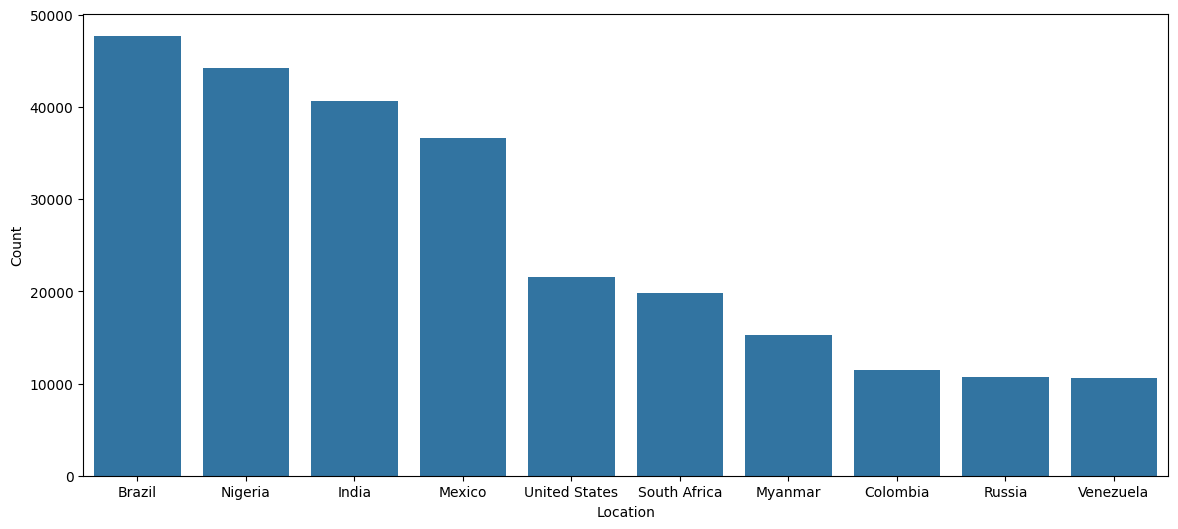

In [18]:
plt.figure(figsize=(14,6))
barplot=sns.barplot(x="Location",y="Count",data=newdf_2)
plt.show()

### Region with value count

In [19]:
newdf_3=df.groupby('Region')['Count'].sum().reset_index()

In [20]:
newdf_3

,Region,Count
0,Africa,99481
1,Americas,153597
2,Asia,105552
3,Europe,19869
4,Oceania,347


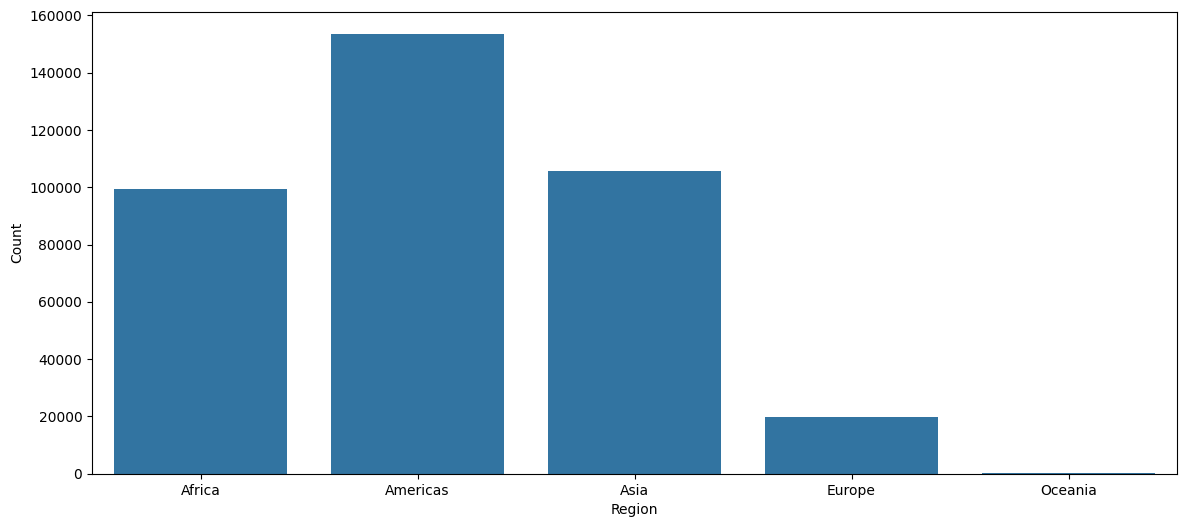

In [21]:
plt.figure(figsize=(14,6))
barplot=sns.barplot(x="Region",y="Count",data=newdf_3)
plt.show()

### Subregion with value count 

In [22]:
newdf_4=df.groupby('Subregion')['Count'].sum().reset_index().head(10)

In [23]:
newdf_4

,Subregion,Count
0,"Aus,NZ",347
1,Caribbean,5037
2,Central America,47371
3,Central Asia,1406
4,Eastern Africa,23669
5,Eastern Asia,8563
6,Eastern Europe,14604
7,Middle Africa,2477
8,Northern Africa,5538
9,Northern America,22317


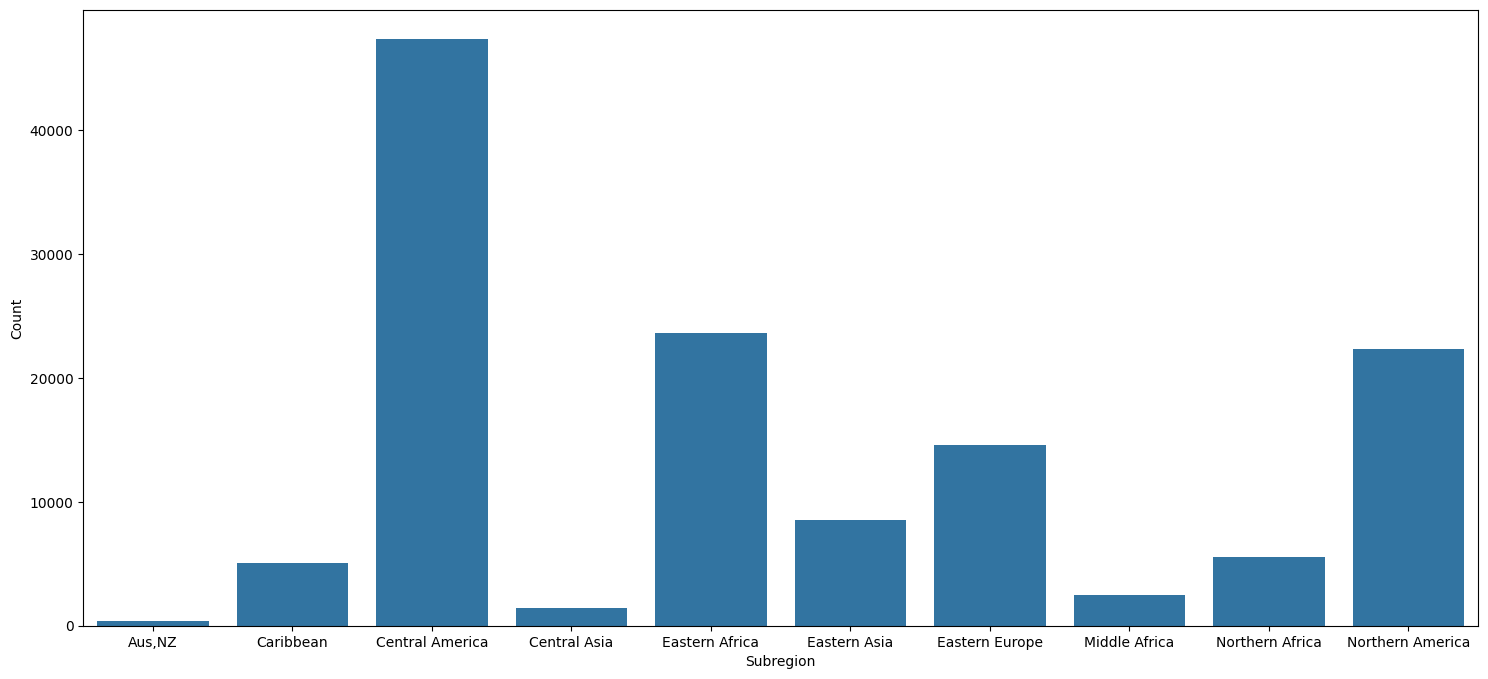

In [24]:
plt.figure(figsize=(18,8))
barplot=sns.barplot(x="Subregion",y="Count",data=newdf_4)
plt.show()

In [26]:
filtered_df = df['Region']
filtered_df

0          Asia
1        Europe
2        Africa
3        Europe
4        Africa
         ...   
190    Americas
191        Asia
192        Asia
193      Africa
194      Africa
Name: Region, Length: 195, dtype: object

### Year should be greater than 2015

In [28]:
new_data=df[df['Year']>2015]

In [29]:
new_data.reset_index(drop=True)

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Antigua and Barbuda,Americas,Caribbean,9,9,2020
...,...,...,...,...,...,...
142,Tanzania,Africa,Eastern Africa,6,3439,2016
143,United States,Americas,Northern America,6,21570,2020
144,Uruguay,Americas,South America,9,337,2020
145,Uzbekistan,Asia,Central Asia,1,396,2019


### Count by Region and Year

In [30]:
grouped_data = new_data.groupby(['Region', 'Year', 'Subregion']).sum().reset_index()

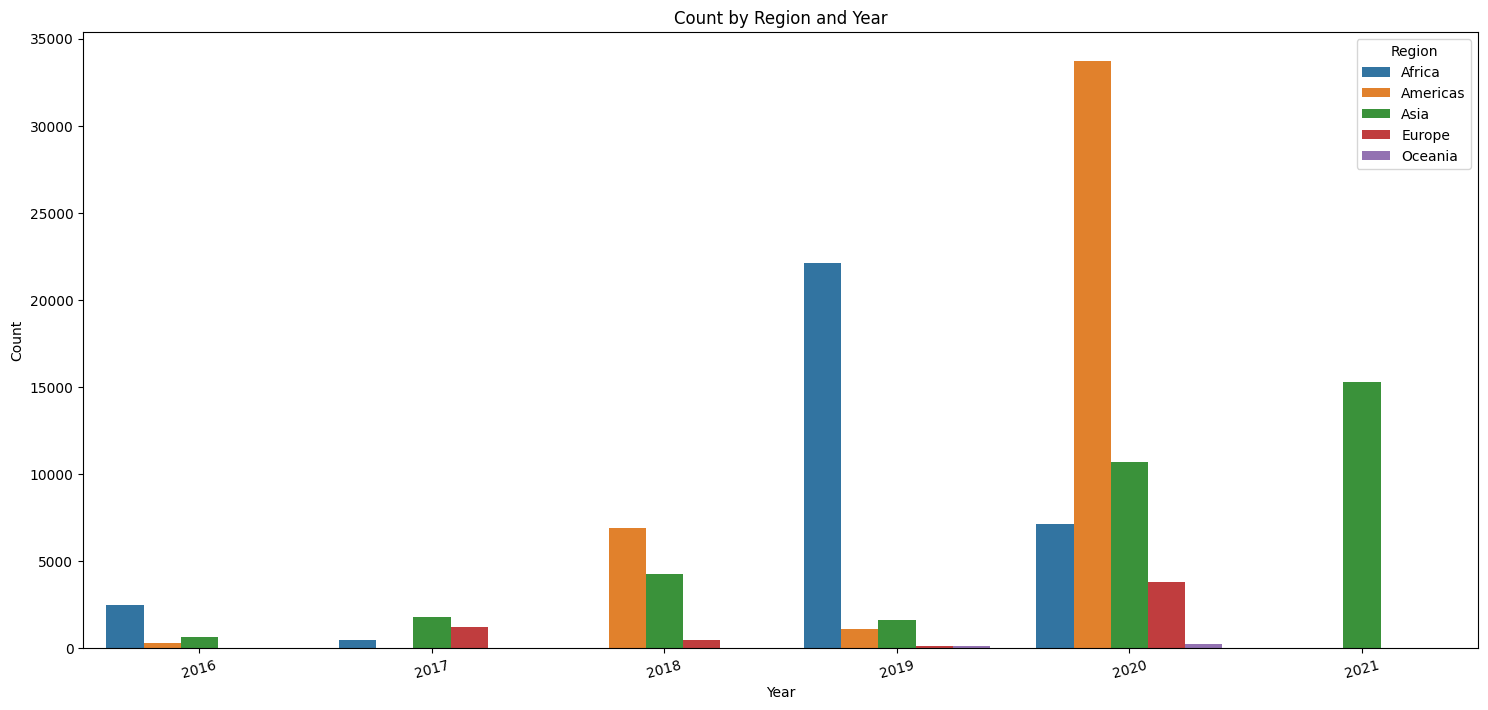

In [31]:
plt.figure(figsize=(18,8))
sns.barplot(x="Year", y="Count", hue="Region", data=grouped_data,errorbar=None)
plt.title("Count by Region and Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title="Region")
plt.xticks(rotation=15) 
plt.show()

### Rate by Region and Year

In [32]:
newdf_5=df.groupby(['Region', 'Year'])['Rate'].sum().reset_index()
newdf_5

,Region,Year,Rate
0,Africa,2008,5
1,Africa,2009,6
2,Africa,2010,15
3,Africa,2011,6
4,Africa,2012,43
5,Africa,2015,51
6,Africa,2016,32
7,Africa,2017,17
8,Africa,2019,32
9,Africa,2020,71


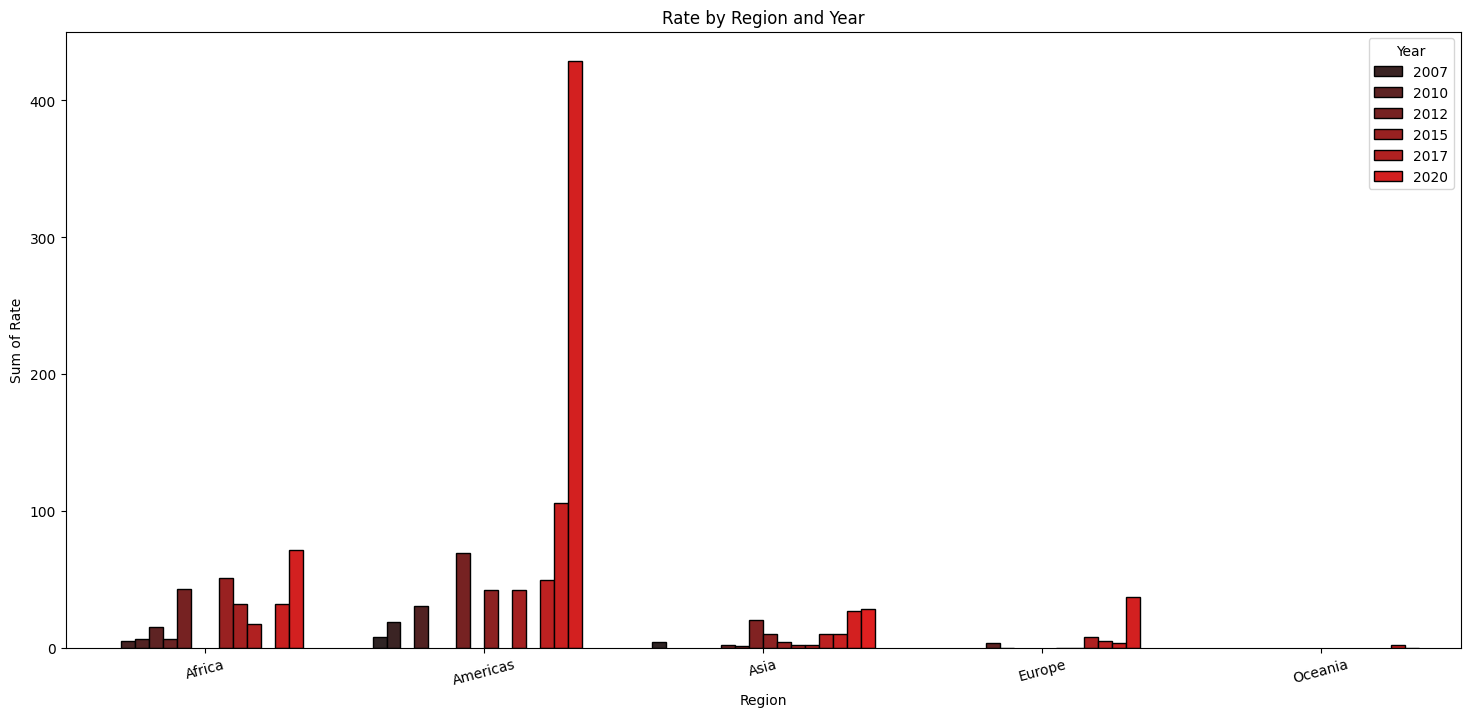

In [33]:
plt.figure(figsize=(18,8))
sns.barplot(x="Region", y="Rate", hue="Year",palette='dark:r', data=newdf_5, errorbar=None,edgecolor='black')
plt.title("Rate by Region and Year")
plt.xlabel("Region")
plt.ylabel("Sum of Rate")
plt.xticks(rotation=15) 
plt.show()

### Tree Map 

In [34]:
newdf_6=df.groupby(['Region', 'Year','Location','Subregion'])['Count'].sum().reset_index()

In [35]:
newdf_6=df[df['Count']>0]
newdf_6

,Location,Region,Subregion,Rate,Count,Year
0,Afghanistan,Asia,Southern Asia,6,2474,2018
1,Albania,Europe,Southern Europe,2,61,2020
2,Algeria,Africa,Northern Africa,1,580,2020
3,Andorra,Europe,Southern Europe,2,2,2020
4,Angola,Africa,Middle Africa,4,1217,2012
...,...,...,...,...,...,...
190,Venezuela,Americas,South America,36,10598,2018
191,Vietnam,Asia,South-Eastern Asia,1,1358,2011
192,Yemen,Asia,Western Asia,6,1703,2013
193,Zambia,Africa,Eastern Africa,5,853,2015


In [39]:
fig = px.treemap(
    newdf_6,
    path=['Region', 'Subregion', 'Location', 'Year'], 
    values='Count', 
    color='Count', 
    color_continuous_scale='Viridis',
    title='Treemap of Count by Region, Year, Location, and Subregion'
)

# Show the plot
fig.show()